In [1119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [1120]:
df = pd.read_csv('housing[1].csv')

# Visualize data

In [1121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [1122]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [1123]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [1124]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

Text(0, 0.5, 'Latitude')

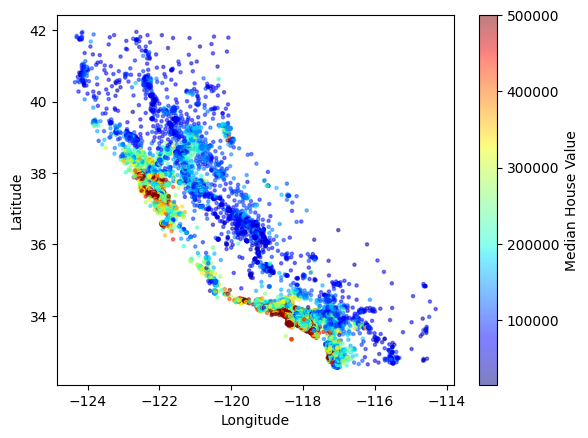

In [1125]:
map = plt.scatter(df['longitude'], df['latitude'], cmap='jet', c=df['median_house_value'], s=5, alpha=0.5)
plt.colorbar(map, label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [1126]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [1127]:
near_bay_df = df.loc[df['ocean_proximity'] == 'NEAR BAY']


Text(0.5, 1.0, 'Near Bay Houses')

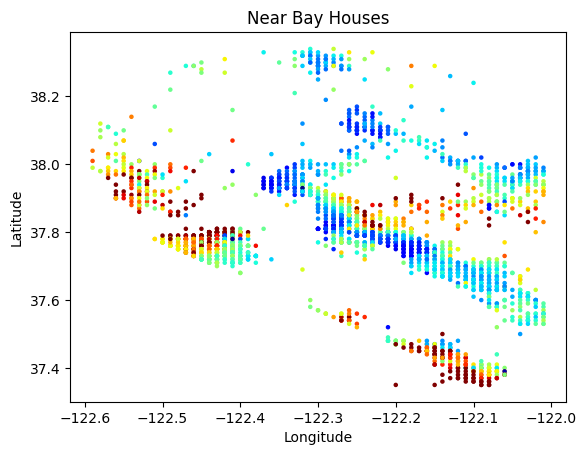

In [1128]:
plt.scatter(near_bay_df['longitude'], near_bay_df['latitude'], cmap='jet', c=near_bay_df['median_house_value'], s=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Near Bay Houses')

In [1129]:
near_ocean_df = df.loc[df['ocean_proximity'] == 'NEAR OCEAN']


Text(0.5, 1.0, 'Near Ocean Houses')

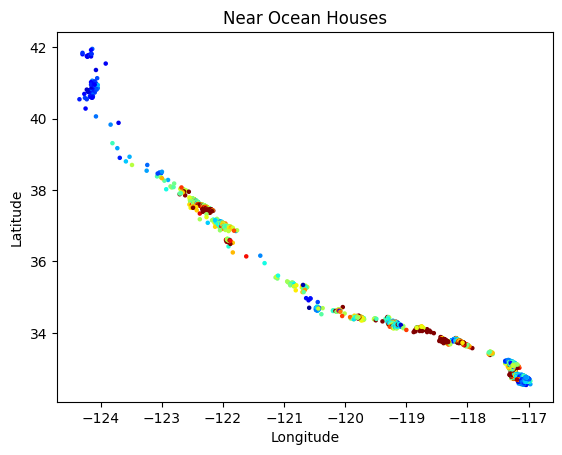

In [1130]:
plt.scatter(near_ocean_df['longitude'], near_ocean_df['latitude'], cmap='jet', c=near_ocean_df['median_house_value'], s=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Near Ocean Houses')

In [1131]:
df['ocean_proximity'].value_counts().index

Index(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object', name='ocean_proximity')

In [1132]:
df['ocean_proximity'] = df['ocean_proximity'].map({'<1HR OCEAN': 2, 'INLAND': 1, 'NEAR OCEAN': 3, 'NEAR BAY': 3, 'ISLAND': 4})

In [1133]:
coor_matrix = df.corr()

In [1134]:
coor_matrix['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049454
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
ocean_proximity       0.553897
Name: median_house_value, dtype: float64

In [1135]:
df['bedrooms_per_house'] = df['total_bedrooms'] / df['households']

In [1136]:
df['rooms_per_house'] = df['total_rooms'] / df['households']

In [1137]:
coor_matrix = df.corr()

In [1138]:
coor_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
ocean_proximity       0.553897
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
bedrooms_per_house   -0.044265
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [1139]:
df_nums = df.drop(columns='ocean_proximity').copy()

In [1140]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   bedrooms_per_house  20640 non-null  float64
 10  rooms_per_house     20640 non-null  float64
dtypes: float64(11)
memory usage: 1.7 MB


In [1141]:
df_nums

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_house,rooms_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1.023810,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.971880,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1.073446,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1.073059,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1.081081,6.281853
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1.133333,5.045455
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1.315789,6.114035
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1.120092,5.205543
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1.171920,5.329513


# Create the model

In [1142]:
class MyLinearRegression:
    def __init__(self, lr = 0.01, iters = 1000):
        self.w = None
        self.b = None
        self.iters = iters
        self.lr = lr
    

    # def fit(self, X, y):
    #     m, n = X.shape
    #     self.w = np.zeros(n)
    #     self.b = 0
        
    #     pred = None
    #     for i in range(self.iters):
    #         pred = np.dot(X, self.w) + self.b
    #         dw = np.zeros(n)
    #         for j in range(n):
    #             dw[j] = (1 / m) * np.dot(X.T.iloc[j].values, (pred - y))
    #         db = (1 / m) * np.sum(pred - y)
        
    #         self.w -= self.lr * dw
    #         self.b -= self.lr * db
    #         if i%100 == 0:
    #             print(self.w)
    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        for i in range(self.iters):
            pred = np.dot(X, self.w) + self.b
            dw = (1 / m) * np.dot(X.T, (pred - y)) # pred and y must be 1D arrays, to prevent any shaping problems
            db = (1 / m) * np.sum(pred - y)
        
            self.w -= self.lr * dw
            self.b -= self.lr * db


    

    def predict(self, X):
        return np.dot(X, self.w) + self.b
    
    


In [1143]:
X = df_nums.drop(columns='median_house_value').copy()
y = pd.DataFrame(df_nums['median_house_value'])

In [1144]:
x_scaler = StandardScaler()
X_scaled = x_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = df_nums.drop(columns='median_house_value').columns
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)
y_scaled = y_scaled.reshape(y_scaled.shape[0])


In [1145]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [1146]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [1147]:
model = MyLinearRegression()

In [1148]:
model.fit(X_train, y_train)

In [1149]:
predictions = model.predict(X_test)

In [1150]:
predictions = predictions.reshape(-1, 1)
predictions = y_scaler.inverse_transform(predictions)

In [1151]:
y_test = y_scaler.inverse_transform(y_test.reshape(-1,1))
my_error = mean_absolute_error(y_test, predictions)
print(f'The error of my implementation is: {my_error}')

The error of my implementation is: 53463.92775836976


Text(0, 0.5, 'Real Data')

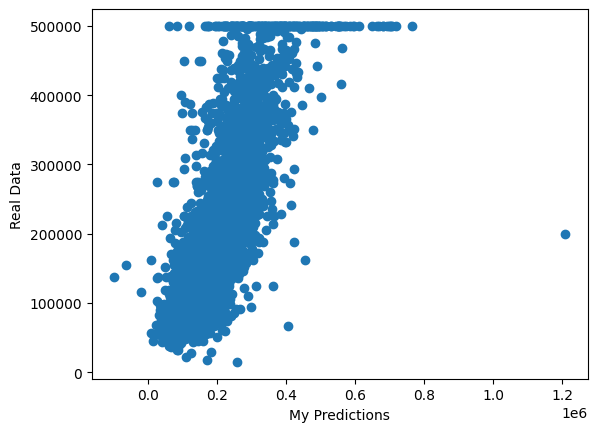

In [1152]:
plt.scatter(predictions, y_test)
plt.xlabel('My Predictions')
plt.ylabel('Real Data')


In [1153]:
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression()

In [1154]:
sk_model.fit(X_train, y_train)

LinearRegression()

In [1155]:
sk_predictions = sk_model.predict(X_test)
sk_predictions = y_scaler.inverse_transform(sk_predictions.reshape(-1, 1))

In [1156]:
sk_predictions

array([[ 85401.28774345],
       [163432.53552088],
       [279282.94259016],
       ...,
       [442756.02795434],
       [127179.38358172],
       [179126.75614029]], shape=(4128, 1))

In [1157]:
sk_error = mean_absolute_error(y_test, sk_predictions)
print(f'The error of sklearn model with scaling is: {sk_error}')

The error of sklearn model with scaling is: 52935.75411741577


Text(0, 0.5, 'Real Data')

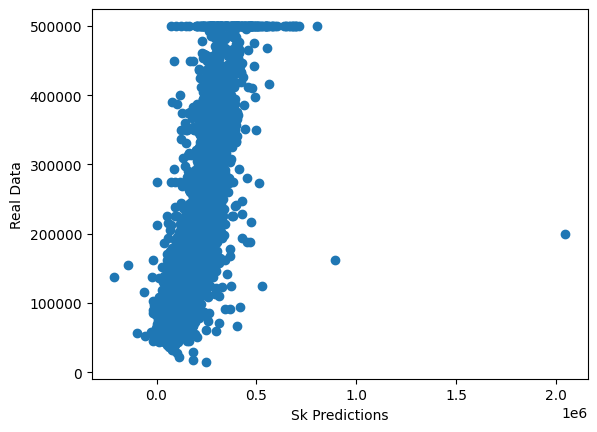

In [1158]:
plt.scatter(sk_predictions, y_test)
plt.xlabel('Sk Predictions')
plt.ylabel('Real Data')


In [1159]:
main_X = df_nums.drop(columns='median_house_value').copy()
main_y = df_nums['median_house_value']

In [1160]:
main_X_train, main_X_test, main_y_train, main_y_test = train_test_split(main_X,main_y)

In [1161]:
main_sk_learn = LinearRegression()
main_sk_learn.fit(main_X_train, main_y_train)

LinearRegression()

In [1162]:
main_pred = main_sk_learn.predict(main_X_test)

In [1163]:
main_error = mean_absolute_error(main_y_test, main_pred)
print(f"The error for sklearn model without scaling is: {main_error}")

The error for sklearn model without scaling is: 50638.91992233795


Text(0, 0.5, 'Real Data')

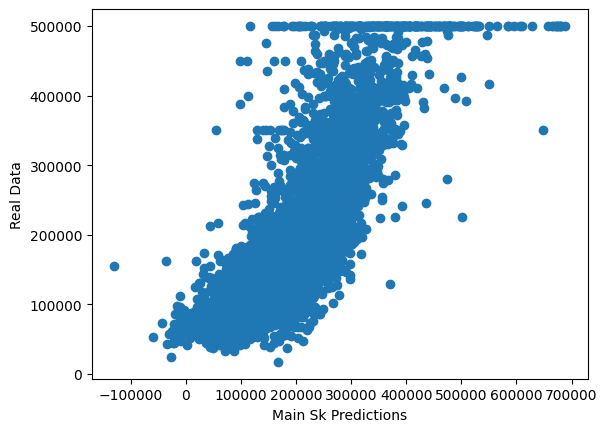

In [1164]:
plt.scatter(main_pred, main_y_test)
plt.xlabel('Main Sk Predictions')
plt.ylabel('Real Data')
